In [1]:
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = None

Site_Energy_Use = pd.read_csv('Dataset_SiteEnergyUse.csv')
Total_GHG_Emissions = pd.read_csv('Dataset_TotalGHGEmissions.csv')
Total_GHG_Emissions_Sans_ENERGYSTARScore = pd.read_csv('Dataset_TotalGHGEmissions.csv')

In [2]:
Site_Energy_Use = Site_Energy_Use.drop('Unnamed: 0', axis=1)
Total_GHG_Emissions = Total_GHG_Emissions.drop('Unnamed: 0', axis=1)
Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop('Unnamed: 0', axis=1)
Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop('ENERGYSTARScore', axis=1)

In [3]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


## Site_Energy_Use

### Sans passage au log de la variable à expliquer

In [5]:
from pycaret.regression import *
exp_name = setup(data = Site_Energy_Use,  target = 'SiteEnergyUse(kBtu)', train_size = 0.8)

,Description,Value
0,session_id,4910
1,Target,SiteEnergyUse(kBtu)
2,Original Data,"(970, 66)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(776, 62)"


In [6]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,825191.0625,1358377536716.8000,1159959.4562,0.6515,0.6079,0.4911,0.0050
lasso,Lasso Regression,826110.2312,1358140879667.2000,1159915.6438,0.6513,0.6018,0.4913,0.0100
llar,Lasso Least Angle Regression,826181.1655,1358235678818.5454,1159957.1064,0.6512,0.6018,0.4913,0.0060
gbr,Gradient Boosting Regressor,791791.3584,1383981066761.0396,1172631.7224,0.6438,0.4784,0.4363,0.0320
lr,Linear Regression,845886.2062,1389849280512.0000,1174330.4875,0.6433,0.6305,0.5091,0.3270
et,Extra Trees Regressor,834206.3382,1616015397557.4954,1262370.0078,0.5854,0.4864,0.4676,0.0850
xgboost,Extreme Gradient Boosting,856156.3250,1672403720601.6001,1284489.1125,0.5687,0.5205,0.4646,0.1420
omp,Orthogonal Matching Pursuit,901946.1489,1689829680223.7966,1291900.2938,0.5662,0.5585,0.5124,0.0050
rf,Random Forest Regressor,860305.4540,1700233390564.1187,1298905.2974,0.5647,0.4995,0.4900,0.0880
lightgbm,Light Gradient Boosting Machine,908243.0029,1719532181595.3445,1309486.3307,0.5582,0.5112,0.4982,0.1030


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=4910, solver='auto', tol=0.001)

In [7]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1006302.4375,1828393844736.0000,1352181.1250,0.6124,0.5958,0.5141
1,827492.2500,1182211637248.0000,1087295.5000,0.7208,0.7610,0.5172
2,839900.8125,1354424778752.0000,1163797.6250,0.6189,0.5829,0.4913
3,814621.3125,1346705686528.0000,1160476.5000,0.6577,0.7707,0.5067
4,748678.0000,1276258680832.0000,1129716.2500,0.6929,0.7393,0.4171
5,825728.8125,1537992818688.0000,1240158.3750,0.6112,0.5520,0.5070
6,695412.2500,830213521408.0000,911160.5625,0.7884,0.4744,0.3760
7,877856.0000,1653303672832.0000,1285808.6250,0.5014,0.7152,0.7820
8,803279.3125,1302372810752.0000,1141215.5000,0.6353,0.4210,0.3925
9,812639.4375,1271897915392.0000,1127784.5000,0.6763,0.4663,0.4070


In [8]:
tuned_ridge = tune_model(ridge, custom_grid = {'alpha': np.linspace(0,2,40)},search_algorithm = 'grid')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,995933.5625,1789729177600.0000,1337807.6250,0.6206,0.5546,0.5088
1,837353.1875,1217054638080.0000,1103202.0000,0.7126,0.7308,0.5243
2,844392.2500,1365019066368.0000,1168340.2500,0.6160,0.5814,0.4975
3,818106.0000,1353767059456.0000,1163515.0000,0.6559,0.7142,0.5089
4,733649.1250,1245494378496.0000,1116017.2500,0.7003,0.8252,0.4093
5,830341.8125,1535536791552.0000,1239167.7500,0.6118,0.5569,0.5046
6,686254.0625,814843887616.0000,902687.0625,0.7924,0.5089,0.3742
7,886266.6250,1656175853568.0000,1286925.0000,0.5005,0.6986,0.7803
8,808365.8750,1321385197568.0000,1149515.2500,0.6300,0.4265,0.3962
9,797273.3750,1243672346624.0000,1115200.6250,0.6835,0.4701,0.4025


In [9]:
# generate predictions on unseen data
y_pred = predict_model(tuned_ridge)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,974931.0625,1587523092480.0000,1259969.5000,0.4307,0.6172,0.5983


#### Analyse des résidus

In [10]:
y_pred['Residuals'] = y_pred['SiteEnergyUse(kBtu)'] - y_pred['Label']

In [11]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1))
y_pred['scaled_Label'] = scale.fit_transform(y_pred['Label'].values.reshape(-1,1)) 

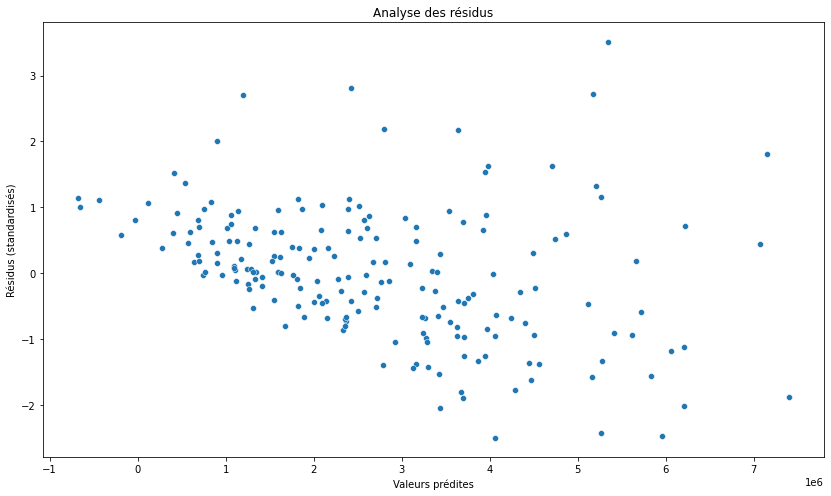

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()


#### Feature Importance

In [13]:
# interpreting model
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
feature_importance =['PrimaryPropertyType_Supermarket / Grocery Store',
                     'PrimaryPropertyType_Supermarket/Grocery Store',
                     'PrimaryPropertyType_Self-Storage Facility',
                     'PrimaryPropertyType_Warehouse',
                     'OtherFuel_Powered',
                     'PrimaryPropertyType_Distribution Center',
                     'PrimaryPropertyType_Non-Refrigerated Warehouse',
                     'Building_Percentage_Of_Total_Area',
                     'PrimaryPropertyType_Senior Care Community',
                     'PrimaryPropertyType_Residence Hall',
                     'SiteEnergyUse(kBtu)']


for i in Site_Energy_Use.columns:
    if i not in feature_importance:
        Site_Energy_Use = Site_Energy_Use.drop(i, axis = 1)

In [15]:
exp_name = setup(data = Site_Energy_Use,  target = 'SiteEnergyUse(kBtu)', train_size = 0.8)

,Description,Value
0,session_id,2145
1,Target,SiteEnergyUse(kBtu)
2,Original Data,"(970, 11)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(776, 10)"


In [16]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1130356.8750,2140477849600.0000,1463037.2500,0.1912,0.7335,0.9250
1,1151653.0000,2341640601600.0000,1530242.0000,0.1140,0.6932,0.8147
2,1236563.0000,2266621804544.0000,1505530.3750,0.4124,0.7222,0.8916
3,1379504.5000,3853347192832.0000,1962994.5000,0.1639,0.6439,0.6262
4,1348880.8750,2738556764160.0000,1654858.5000,0.3329,0.8002,1.0517
5,1426767.8750,3705425362944.0000,1924948.1250,0.1370,0.7458,0.8574
6,1263362.3750,2834977259520.0000,1683739.1250,0.2198,0.7045,0.8650
7,1315069.8750,3258472464384.0000,1805124.0000,0.1770,0.7406,0.8549
8,1485805.5000,3830653386752.0000,1957205.5000,0.1507,0.8823,1.3160
9,1583615.6250,3827034488832.0000,1956280.7500,0.0440,0.7617,0.8608


In [17]:
# generate predictions on unseen data
y_pred = predict_model(ridge)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,1212282.3750,2686222860288.0000,1638970.0000,0.1411,0.7124,0.8453


### Avec passage au log de la variable à expliquer

In [25]:
Site_Energy_Use = pd.read_csv('Dataset_SiteEnergyUse.csv')
Site_Energy_Use = Site_Energy_Use.drop('Unnamed: 0', axis=1)

In [27]:
for i in Site_Energy_Use.columns:
    print(i)

NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)
LargestPropertyUseTypeGFA
ENERGYSTARScore
SiteEnergyUse(kBtu)
Parking_Percentage_Of_Total_Area
Building_Percentage_Of_Total_Area
AgeBuilding
ElectricityPowerded
Steam_Powered
NaturalGas_Powered
OtherFuel_Powered
Neighborhood_BALLARD
Neighborhood_CENTRAL
Neighborhood_DELRIDGE
Neighborhood_DOWNTOWN
Neighborhood_EAST
Neighborhood_GREATER DUWAMISH
Neighborhood_LAKE UNION
Neighborhood_MAGNOLIA / QUEEN ANNE
Neighborhood_NORTH
Neighborhood_NORTHEAST
Neighborhood_NORTHWEST
Neighborhood_SOUTHEAST
Neighborhood_SOUTHWEST
CouncilDistrictCode_1
CouncilDistrictCode_2
CouncilDistrictCode_3
CouncilDistrictCode_4
CouncilDistrictCode_5
CouncilDistrictCode_6
CouncilDistrictCode_7
PrimaryPropertyType_College/University
PrimaryPropertyType_Distribution Center
PrimaryPropertyType_Hospital
PrimaryPropertyType_Hotel
PrimaryPropertyType_K-12 School
PrimaryPropertyType_Laboratory
PrimaryPropertyType_Large Office
PrimaryP

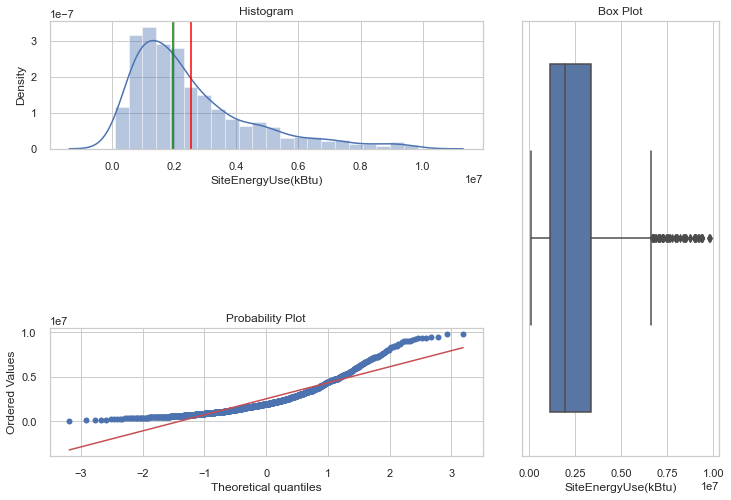

In [28]:
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[2, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)
 
    ax3 = fig.add_subplot(grid[:, 2]) 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(Site_Energy_Use, 'SiteEnergyUse(kBtu)')

In [29]:
from scipy.stats import skew
print("Skewness of the SiteEnergyUse(kBtu) is", Site_Energy_Use['SiteEnergyUse(kBtu)'].skew())

Skewness of the SiteEnergyUse(kBtu) is 1.452784575678127


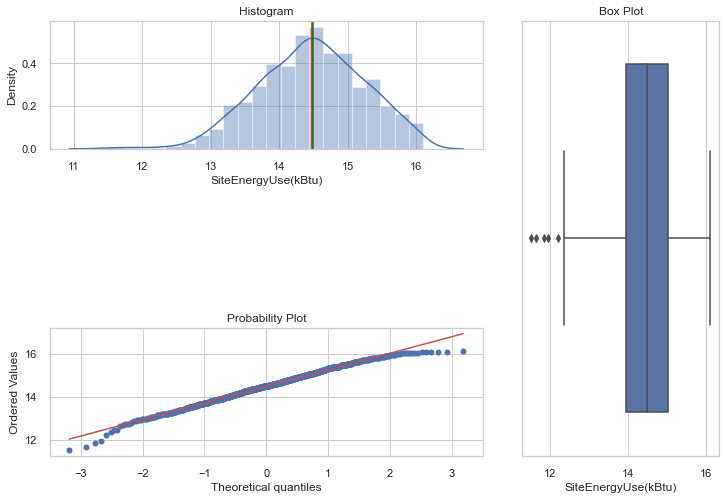

In [30]:
Site_Energy_Use["SiteEnergyUse(kBtu)"] = np.log1p(Site_Energy_Use["SiteEnergyUse(kBtu)"])
three_chart_plot(Site_Energy_Use, 'SiteEnergyUse(kBtu)')

In [31]:
print("Skewness of the SiteEnergyUse(kBtu) is", Site_Energy_Use['SiteEnergyUse(kBtu)'].skew())

Skewness of the SiteEnergyUse(kBtu) is -0.2448596119047726


In [32]:
from pycaret.regression import *
exp_name = setup(data = Site_Energy_Use,  target = 'SiteEnergyUse(kBtu)', train_size = 0.8)

,Description,Value
0,session_id,1240
1,Target,SiteEnergyUse(kBtu)
2,Original Data,"(970, 66)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(776, 63)"


In [36]:
exp_name

(-1,
      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
 57                 1.0             4.0           64893.0                 0.0   
 269                1.0             1.0           35618.5                 0.0   
 656                1.0             1.0           28895.0              4155.5   
 609                1.0             1.0           29771.0                 0.0   
 34                 1.0             2.0           58933.0                 0.0   
 ..                 ...             ...               ...                 ...   
 720                1.0             1.0           37435.5                 0.0   
 540                1.0             5.0           78042.5              5113.0   
 396                1.0             3.0           25262.0                 0.0   
 876                1.0             2.0           22952.0                 0.0   
 246                1.0             2.0           45127.0                 0.0   
 
      PropertyGFABuil

In [24]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3415,0.1994,0.4447,0.6490,0.0292,0.0238,0.0330
ridge,Ridge Regression,0.3628,0.2168,0.4640,0.6164,0.0304,0.0253,0.0050
br,Bayesian Ridge,0.3633,0.2174,0.4645,0.6162,0.0304,0.0253,0.0060
lr,Linear Regression,0.3664,0.2195,0.4675,0.6106,0.0306,0.0255,0.0060
xgboost,Extreme Gradient Boosting,0.3738,0.2352,0.4834,0.5823,0.0317,0.0261,0.1370
et,Extra Trees Regressor,0.3675,0.2386,0.4869,0.5795,0.0319,0.0256,0.0880
lightgbm,Light Gradient Boosting Machine,0.3793,0.2482,0.4964,0.5590,0.0325,0.0264,0.1100
rf,Random Forest Regressor,0.3787,0.2535,0.5018,0.5557,0.0329,0.0264,0.0880
omp,Orthogonal Matching Pursuit,0.3976,0.2738,0.5193,0.5256,0.0339,0.0277,0.0050
ada,AdaBoost Regressor,0.4225,0.2864,0.5327,0.4997,0.0348,0.0294,0.0280


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=942, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [119]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2969,0.1827,0.4274,0.6905,0.0282,0.0207
1,0.3346,0.2040,0.4517,0.6424,0.0291,0.0231
2,0.3015,0.1508,0.3884,0.7148,0.0249,0.0207
3,0.3431,0.1949,0.4415,0.6448,0.0287,0.0239
4,0.2557,0.1200,0.3464,0.7754,0.0229,0.0178
5,0.3820,0.2393,0.4892,0.6338,0.0328,0.0273
6,0.3304,0.1952,0.4418,0.6852,0.0288,0.0229
7,0.3295,0.1911,0.4372,0.6207,0.0289,0.0232
8,0.3329,0.2009,0.4482,0.6859,0.0295,0.0233
9,0.3563,0.2454,0.4954,0.6034,0.0328,0.0249


In [120]:
tuned_gbr = tune_model(gbr, custom_grid = {'learning_rate': np.linspace(0,2,40)},search_algorithm = 'grid')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3103,0.1918,0.4379,0.6751,0.0289,0.0216
1,0.3333,0.1978,0.4447,0.6534,0.0287,0.0230
2,0.3001,0.1411,0.3757,0.7332,0.0240,0.0206
3,0.3417,0.1989,0.4460,0.6374,0.0290,0.0238
4,0.2601,0.1224,0.3499,0.7710,0.0230,0.0181
5,0.3734,0.2312,0.4808,0.6462,0.0322,0.0267
6,0.3240,0.1902,0.4361,0.6932,0.0283,0.0224
7,0.3288,0.1909,0.4369,0.6212,0.0289,0.0231
8,0.3327,0.2044,0.4521,0.6803,0.0297,0.0233
9,0.3557,0.2392,0.4891,0.6134,0.0324,0.0249


In [121]:
y_pred = predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.3555,0.2021,0.4495,0.6640,0.0295,0.0247


#### Analyse des résidus

In [122]:
y_pred['Residuals'] = y_pred['SiteEnergyUse(kBtu)'] - y_pred['Label']

In [123]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1))
y_pred['scaled_Label'] = scale.fit_transform(y_pred['Label'].values.reshape(-1,1)) 

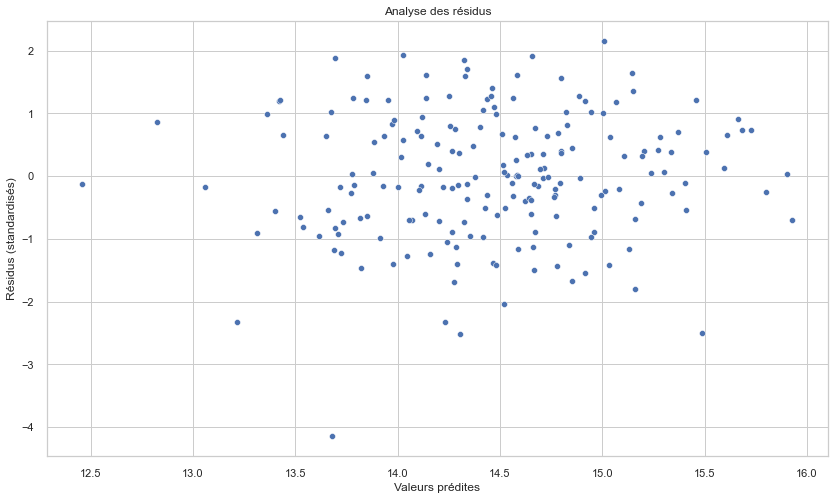

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()

#### Feature Importance

In [125]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
pd.set_option('display.max_columns', None)
Site_Energy_Use.head(1)

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),Parking_Percentage_Of_Total_Area,Building_Percentage_Of_Total_Area,AgeBuilding,ElectricityPowerded,Steam_Powered,NaturalGas_Powered,OtherFuel_Powered,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,PrimaryPropertyType_College/University,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Residence Hall/Dormitory,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_SPS-District K-12,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_Supermarket/Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12
0,1.0,12.0,88434.0,0.0,88434.0,88434.0,62.5,15.776154,0.0,1.0,94,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
feature_importance =['PropertyGFATotal',
                     'LargestPropertyUseTypeGFA',
                     'ENERGYSTARScore',
                     'NaturalGas_Powered',
                     'Neighborhood_GREATER DUWAMISH',
                     'PrimaryPropertyType_Supermarket / Grocery Store',
                     'PrimaryPropertyType_Non-Refrigerated Warehouse',
                     'PrimaryPropertyType_Warehouse',
                     'PropertyGFABuilding(s)',
                     'AgeBuilding',
                     'SiteEnergyUse(kBtu)']


for i in Site_Energy_Use.columns:
    if i not in feature_importance:
        Site_Energy_Use = Site_Energy_Use.drop(i, axis = 1)

In [33]:
exp_name = setup(data = Site_Energy_Use,  target = 'SiteEnergyUse(kBtu)', train_size = 0.8)

,Description,Value
0,session_id,4623
1,Target,SiteEnergyUse(kBtu)
2,Original Data,"(970, 11)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(776, 10)"


In [34]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3774,0.2304,0.4800,0.6274,0.0313,0.0261
1,0.3972,0.2918,0.5402,0.4433,0.0350,0.0277
2,0.3244,0.1967,0.4435,0.6169,0.0286,0.0225
3,0.3723,0.2308,0.4805,0.5569,0.0315,0.0259
4,0.3621,0.2101,0.4584,0.6151,0.0296,0.0251
5,0.4528,0.3759,0.6131,0.4437,0.0399,0.0314
6,0.3531,0.2019,0.4494,0.6533,0.0291,0.0244
7,0.3757,0.2816,0.5306,0.5925,0.0351,0.0264
8,0.4113,0.2780,0.5272,0.4674,0.0343,0.0287
9,0.3725,0.2255,0.4749,0.5632,0.0312,0.0260


In [35]:
tuned_gbr = tune_model(gbr, custom_grid = {'learning_rate': np.linspace(0,2,40)},search_algorithm = 'grid')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3712,0.2157,0.4644,0.6512,0.0302,0.0257
1,0.3989,0.2800,0.5291,0.4659,0.0344,0.0278
2,0.3181,0.1916,0.4377,0.6269,0.0282,0.0220
3,0.3723,0.2296,0.4792,0.5592,0.0315,0.0259
4,0.3676,0.2106,0.4589,0.6143,0.0296,0.0254
5,0.4568,0.3609,0.6008,0.4659,0.0390,0.0316
6,0.3492,0.2097,0.4579,0.6400,0.0297,0.0241
7,0.3721,0.2798,0.5290,0.5951,0.0351,0.0262
8,0.4004,0.2678,0.5175,0.4870,0.0338,0.0280
9,0.3688,0.2229,0.4722,0.5682,0.0311,0.0258


In [36]:
# generate predictions on unseen data
y_pred = predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.3852,0.2518,0.5018,0.6139,0.0333,0.0271


## TotalGHGEmissions (avec ENERGYSTARScore)

### Sans passage au log de la variable à expliquer

In [37]:
Total_GHG_Emissions = pd.read_csv('Dataset_TotalGHGEmissions.csv')
Total_GHG_Emissions = Total_GHG_Emissions.drop('Unnamed: 0', axis=1)

In [38]:
from pycaret.regression import *
exp_name = setup(data = Total_GHG_Emissions,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,680
1,Target,TotalGHGEmissions
2,Original Data,"(866, 66)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(692, 62)"


In [39]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,45.0619,6033.2643,75.4473,0.2758,1.0572,2.5687,0.0070
ridge,Ridge Regression,46.1092,6119.2124,76.4876,0.2393,1.1226,2.6283,0.0050
rf,Random Forest Regressor,44.3775,6345.6017,77.4481,0.2240,1.0117,2.3466,0.0900
et,Extra Trees Regressor,43.7082,6097.6797,76.5808,0.2184,0.9948,2.0223,0.0840
gbr,Gradient Boosting Regressor,45.3695,6649.0426,79.1880,0.1823,1.0619,2.4796,0.0290
omp,Orthogonal Matching Pursuit,47.5383,6877.4959,80.6684,0.1697,1.0933,2.8894,0.0050
en,Elastic Net,49.7764,6982.6767,81.5453,0.1539,1.1570,2.9593,0.0100
lr,Linear Regression,49.4541,6555.2261,79.5182,0.1522,1.1736,2.7071,0.0050
lightgbm,Light Gradient Boosting Machine,49.8387,7111.0792,82.2845,0.1323,1.1850,2.4199,0.0360
br,Bayesian Ridge,52.6558,7497.0890,84.5058,0.0916,1.2279,3.4555,0.0060


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=680,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.1767,4746.5664,68.8953,0.3193,1.0530,2.6618
1,40.1829,3103.9380,55.7130,0.5122,0.8792,1.5336
2,51.5613,10862.7822,104.2247,0.1964,1.0573,1.9995
3,44.2049,5636.2285,75.0748,-0.0149,1.1037,2.7069
4,37.1848,2832.2876,53.2192,0.4224,0.8576,1.4006
5,53.9515,8602.6016,92.7502,0.4057,1.1288,6.5467
6,44.1052,8103.7798,90.0210,0.2367,1.0297,2.1028
7,54.7455,9324.4736,96.5633,0.1553,1.1931,1.9142
8,42.4617,4604.4165,67.8559,0.2406,1.1631,2.3553
9,38.0449,2515.5691,50.1554,0.2845,1.1059,2.4659


In [41]:
tuned_lasso = tune_model(lasso, custom_grid = {'alpha': np.linspace(0,2,20)},search_algorithm = 'grid')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43.7981,4567.8130,67.5856,0.3449,1.0383,2.6655
1,39.2702,3029.2632,55.0387,0.5239,0.8758,1.6802
2,50.4996,10388.2656,101.9228,0.2315,1.0216,1.8904
3,44.8545,5944.1021,77.0980,-0.0703,1.0758,2.6691
4,35.8887,2637.9482,51.3610,0.4620,0.8294,1.4100
5,52.1792,8148.9629,90.2716,0.4371,1.1214,6.2592
6,44.3628,7997.2881,89.4276,0.2467,0.9934,2.0959
7,54.9775,9148.3008,95.6468,0.1712,1.2082,1.9920
8,43.0337,4917.6260,70.1258,0.1889,1.1528,2.2185
9,36.8014,2402.8345,49.0187,0.3165,1.0911,2.4381


In [42]:
# generate predictions on unseen data
y_pred = predict_model(tuned_lasso)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,44.1655,4510.6924,67.1617,0.3357,1.0505,2.3632


#### Analyse des résidus

In [43]:
y_pred['Residuals'] = y_pred['TotalGHGEmissions'] - y_pred['Label']


from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1)) 

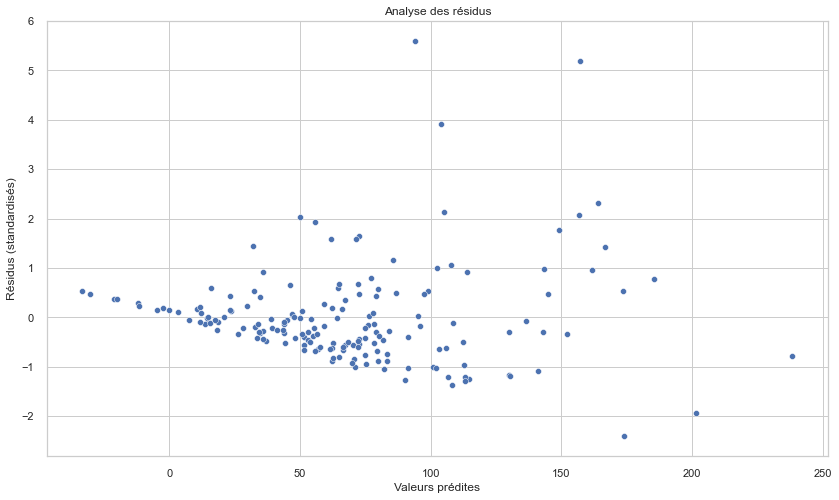

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()

#### Feature Importance

In [45]:
evaluate_model(tuned_lasso)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [46]:
feature_importance =['Neighborhood_NORTHWEST',
                     'PrimaryPropertyType_Supermarket / Grocery Store',
                     'NaturalGas_Powered',
                     'PrimaryPropertyType_Senior Care Community',
                     'PrimaryPropertyType_Hotel',
                     'Steam_Powered',
                     'PrimaryPropertyType_Non-Refrigerated Warehouse',
                     'PrimaryPropertyType_Distribution Center',
                     'PrimaryPropertyType_Warehouse',
                     'PrimaryPropertyType_Supermarket/Grocery Store',
                     'TotalGHGEmissions']


for i in Total_GHG_Emissions.columns:
    if i not in feature_importance:
        Total_GHG_Emissions = Total_GHG_Emissions.drop(i, axis = 1)

In [47]:
exp_name = setup(data = Total_GHG_Emissions,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,6211
1,Target,TotalGHGEmissions
2,Original Data,"(866, 11)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(692, 10)"


In [48]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43.7021,7014.1758,83.7507,0.1841,0.9913,1.7444
1,41.2259,3591.4932,59.9291,0.0237,1.1171,2.5054
2,55.6700,9644.5029,98.2064,0.2558,1.2376,2.6207
3,46.8394,7953.9292,89.1848,0.2576,1.1246,2.6449
4,53.4536,6794.0977,82.4263,0.2250,1.0505,1.9175
5,43.8620,4760.2241,68.9944,0.3967,1.0462,2.5578
6,49.7527,7429.9282,86.1970,0.3089,0.9804,1.5165
7,47.6861,3990.0815,63.1671,0.3576,1.2965,9.0342
8,48.3727,6273.0010,79.2023,0.2338,1.1473,3.2680
9,50.3945,6150.2124,78.4233,-0.2407,1.3273,2.8231


In [49]:
tuned_lasso = tune_model(lasso, custom_grid = {'alpha': np.linspace(0,2,20)},search_algorithm = 'grid')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43.2231,6944.3350,83.3327,0.1922,0.9499,1.5279
1,41.4753,3954.8481,62.8876,-0.0750,1.0679,2.1756
2,53.7201,8629.7695,92.8966,0.3341,1.1998,2.2775
3,45.0188,7271.7266,85.2744,0.3213,1.0614,2.2794
4,52.4662,6423.9297,80.1494,0.2672,1.0007,1.7026
5,41.9065,4206.3857,64.8567,0.4669,1.0124,2.3436
6,47.7368,7093.2852,84.2216,0.3402,0.9316,1.3633
7,45.4641,3532.5286,59.4351,0.4313,1.2592,8.5482
8,49.8812,6523.9033,80.7707,0.2031,1.1502,3.3275
9,51.1945,6680.9238,81.7369,-0.3477,1.3180,2.6337


In [50]:
# generate predictions on unseen data
y_pred = predict_model(tuned_lasso)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,46.4142,5946.9712,77.1166,0.1284,1.1773,2.9546


### Avec passage au log de la variable à expliquer

In [51]:
Total_GHG_Emissions = pd.read_csv('Dataset_TotalGHGEmissions.csv')
Total_GHG_Emissions = Total_GHG_Emissions.drop('Unnamed: 0', axis=1)

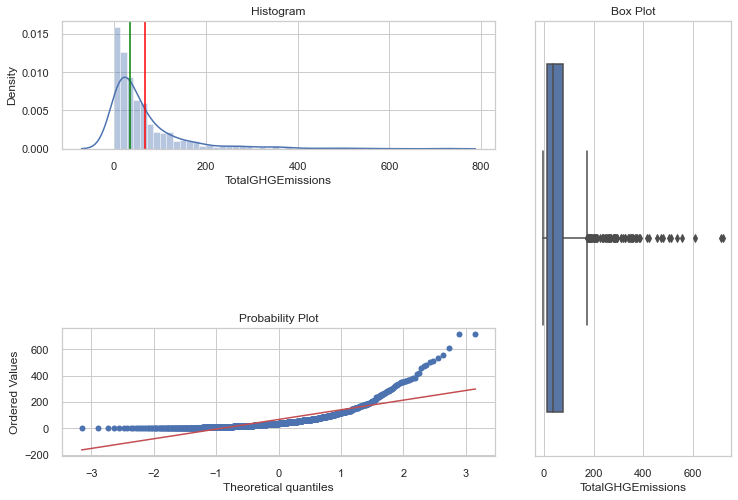

In [52]:
three_chart_plot(Total_GHG_Emissions, 'TotalGHGEmissions')

In [53]:
from scipy.stats import skew
print("Skewness of TotalGHGEmissions is", Total_GHG_Emissions['TotalGHGEmissions'].skew())

Skewness of TotalGHGEmissions is 3.105742678040428


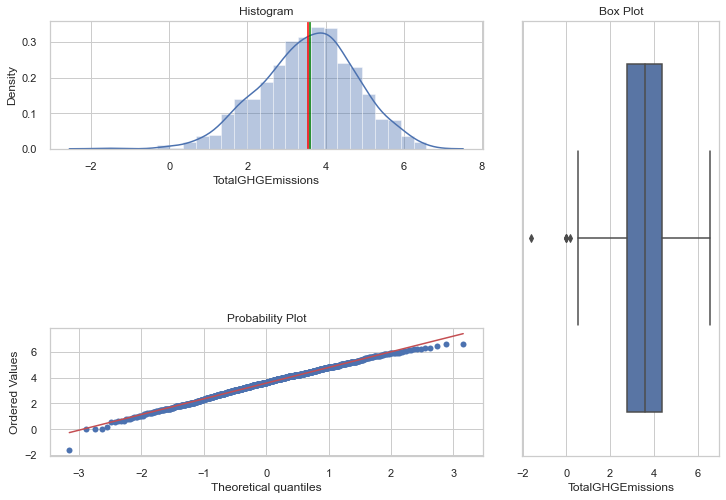

In [54]:
Total_GHG_Emissions["TotalGHGEmissions"] = np.log1p(Total_GHG_Emissions["TotalGHGEmissions"])
three_chart_plot(Total_GHG_Emissions, 'TotalGHGEmissions')

In [55]:
print("Skewness of TotalGHGEmissions is", Total_GHG_Emissions['TotalGHGEmissions'].skew())

Skewness of TotalGHGEmissions is -0.2588118749450214


In [56]:
from pycaret.regression import *
exp_name = setup(data = Total_GHG_Emissions,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,1451
1,Target,TotalGHGEmissions
2,Original Data,"(866, 66)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(692, 64)"


In [57]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.6867,0.8550,0.9152,0.4178,0.2340,0.2715,0.0050
br,Bayesian Ridge,0.6886,0.8558,0.9169,0.4165,0.2345,0.2748,0.0050
omp,Orthogonal Matching Pursuit,0.7134,0.9081,0.9461,0.3806,0.2410,0.2875,0.0050
lr,Linear Regression,0.7141,0.9196,0.9439,0.3771,0.2389,0.2839,0.0050
gbr,Gradient Boosting Regressor,0.7113,0.9290,0.9557,0.3654,0.2447,0.2834,0.0300
rf,Random Forest Regressor,0.7212,0.9407,0.9644,0.3541,0.2445,0.2852,0.0830
et,Extra Trees Regressor,0.7212,0.9687,0.9791,0.3347,0.2504,0.2818,0.0790
lightgbm,Light Gradient Boosting Machine,0.7539,1.0070,0.9984,0.3045,0.2529,0.2941,0.1010
ada,AdaBoost Regressor,0.8078,1.0728,1.0282,0.2747,0.2575,0.3207,0.0240
en,Elastic Net,0.8612,1.1760,1.0760,0.2064,0.2702,0.3453,0.0080


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1451, solver='auto', tol=0.001)

In [58]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8176,1.1665,1.0800,0.2994,0.3015,0.6294
1,0.7903,0.9948,0.9974,0.2675,0.2244,0.2419
2,0.5841,0.7460,0.8637,0.5571,0.2098,0.2831
3,0.6890,0.8017,0.8954,0.3854,0.2252,0.2638
4,0.5871,0.5860,0.7655,0.4917,0.1808,0.1924
5,0.5709,0.5736,0.7574,0.4305,0.1804,0.1926
6,0.7725,1.0113,1.0056,0.4024,0.2692,0.2657
7,0.7662,1.2568,1.1211,0.2564,0.3102,0.2454
8,0.6855,0.7941,0.8911,0.4453,0.2623,0.2293
9,0.6226,0.6271,0.7919,0.6296,0.1810,0.2040


In [59]:
tuned_br = tune_model(br, custom_grid = {'n_iter': range(200,500,10)},search_algorithm = 'grid')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8176,1.1665,1.0800,0.2994,0.3015,0.6294
1,0.7903,0.9948,0.9974,0.2675,0.2244,0.2419
2,0.5841,0.7460,0.8637,0.5571,0.2098,0.2831
3,0.6890,0.8017,0.8954,0.3854,0.2252,0.2638
4,0.5871,0.5860,0.7655,0.4917,0.1808,0.1924
5,0.5709,0.5736,0.7574,0.4305,0.1804,0.1926
6,0.7725,1.0113,1.0056,0.4024,0.2692,0.2657
7,0.7662,1.2568,1.1211,0.2564,0.3102,0.2454
8,0.6855,0.7941,0.8911,0.4453,0.2623,0.2293
9,0.6226,0.6271,0.7919,0.6296,0.1810,0.2040


In [60]:
# generate predictions on unseen data
y_pred = predict_model(tuned_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.6727,0.7385,0.8593,0.4896,0.2172,0.2617


#### Analyse des résidus

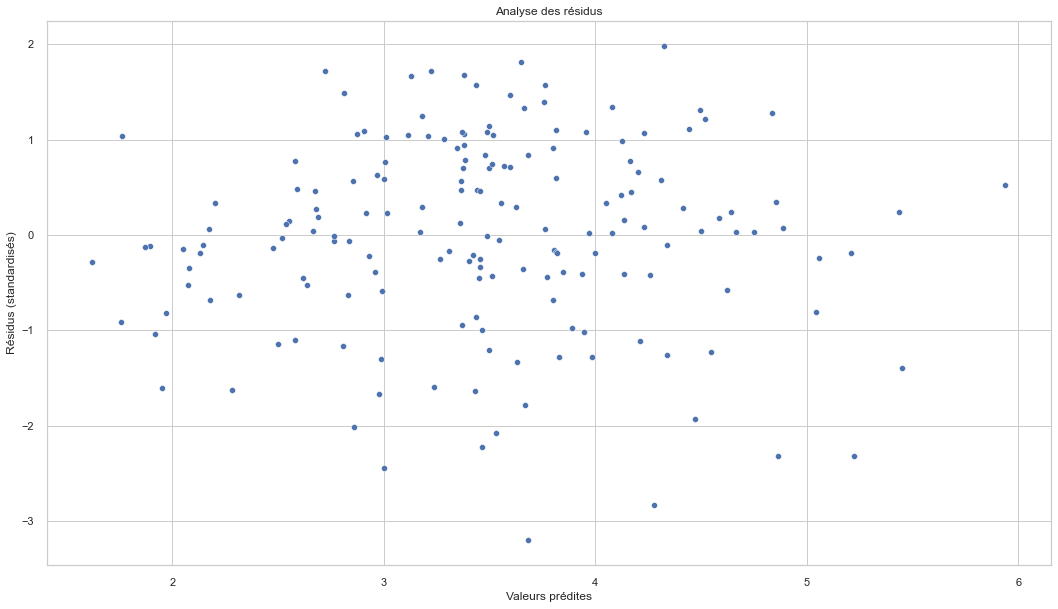

In [61]:
y_pred['Residuals'] = y_pred['TotalGHGEmissions'] - y_pred['Label']


from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1)) 



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()

#### Feature Importance

In [62]:
evaluate_model(tuned_br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [63]:
feature_importance =['Steam_Powered',
                     'NaturalGas_Powered',
                     'PrimaryPropertyType_Self-Storage Facility'
                     'PrimaryPropertyType_Supermarket / Grocery Store',
                     'PrimaryPropertyType_Warehouse',
                     'Neighborhood_NORTH',
                     'PrimaryPropertyType_Senior Care Community',
                     'CounsilDistrictCode_5_1',
                     'PrimaryPropertyType_Laboratory',
                     'TotalGHGEmissions',
                     'PrimaryPropertyType_Non-Refrigerated Warehouse']


for i in Total_GHG_Emissions.columns:
    if i not in feature_importance:
        Total_GHG_Emissions = Total_GHG_Emissions.drop(i, axis = 1)

In [64]:
exp_name = setup(data = Total_GHG_Emissions,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,6548
1,Target,TotalGHGEmissions
2,Original Data,"(866, 8)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(692, 7)"


In [65]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8791,1.2059,1.0981,0.2423,0.2867,0.4004
1,0.8168,0.9663,0.9830,0.2670,0.2134,0.2362
2,0.7258,0.8044,0.8969,0.3449,0.2196,0.2665
3,0.8450,1.1811,1.0868,0.3279,0.3083,0.5836
4,0.8728,1.3543,1.1638,0.1326,0.3152,0.3025
5,0.7664,0.9780,0.9890,0.1959,0.2350,0.2748
6,0.7487,0.8262,0.9090,0.3292,0.2138,0.2467
7,0.6754,0.7861,0.8866,0.4363,0.2223,0.2625
8,0.8503,1.1172,1.0570,0.2114,0.2817,0.3901
9,0.8709,1.3368,1.1562,0.1040,0.2472,0.3261


In [66]:
tuned_br = tune_model(br, custom_grid = {'n_iter': range(200,500,10)},search_algorithm = 'grid')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8791,1.2059,1.0981,0.2423,0.2867,0.4004
1,0.8168,0.9663,0.9830,0.2670,0.2134,0.2362
2,0.7258,0.8044,0.8969,0.3449,0.2196,0.2665
3,0.8450,1.1811,1.0868,0.3279,0.3083,0.5836
4,0.8728,1.3543,1.1638,0.1326,0.3152,0.3025
5,0.7664,0.9780,0.9890,0.1959,0.2350,0.2748
6,0.7487,0.8262,0.9090,0.3292,0.2138,0.2467
7,0.6754,0.7861,0.8866,0.4363,0.2223,0.2625
8,0.8503,1.1172,1.0570,0.2114,0.2817,0.3901
9,0.8709,1.3368,1.1562,0.1040,0.2472,0.3261


In [67]:
# generate predictions on unseen data
y_pred = predict_model(tuned_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.8974,1.3152,1.1468,0.1554,0.2897,0.3231


## TotalGHGEmissions (sans ENERGYSTARScore)

### Sans passage au log de la variable à expliquer

In [68]:
Total_GHG_Emissions_Sans_ENERGYSTARScore = pd.read_csv('Dataset_TotalGHGEmissions.csv')
Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop('Unnamed: 0', axis=1)
Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop('ENERGYSTARScore', axis=1)

In [69]:
from pycaret.regression import *
exp_name = setup(data = Total_GHG_Emissions_Sans_ENERGYSTARScore,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,7137
1,Target,TotalGHGEmissions
2,Original Data,"(866, 65)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(692, 63)"


In [70]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,48.4160,6778.2924,80.6453,0.2334,1.1029,2.8010,0.0090
ridge,Ridge Regression,49.4042,6658.7945,80.5400,0.2246,1.1092,2.6599,0.0050
gbr,Gradient Boosting Regressor,47.6414,6871.5253,81.8158,0.1900,1.0789,2.6022,0.0310
lr,Linear Regression,51.1994,7020.9189,82.8623,0.1743,1.1406,2.7430,0.0050
rf,Random Forest Regressor,49.0334,7183.1263,83.5928,0.1593,1.0589,2.4749,0.0920
en,Elastic Net,52.4430,7478.7625,85.0251,0.1416,1.1858,3.3208,0.0080
omp,Orthogonal Matching Pursuit,49.9176,7559.3495,85.6137,0.1315,1.1224,3.0532,0.0050
lightgbm,Light Gradient Boosting Machine,55.1206,7654.7173,86.1749,0.1055,1.2087,2.7250,0.0360
br,Bayesian Ridge,54.6896,7822.7962,87.1868,0.0943,1.2387,3.6752,0.0060
llar,Lasso Least Angle Regression,58.2956,8428.7468,90.3583,0.0378,1.3489,4.4618,0.0060


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=7137,
      selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,47.6922,6816.7881,82.5638,0.2125,1.1247,1.7729
1,45.9180,4841.0576,69.5777,0.3617,1.0657,2.6505
2,54.8627,10053.8379,100.2688,0.0553,1.1553,3.0796
3,45.6164,5895.9717,76.7852,0.0711,1.0811,2.0174
4,38.7911,2953.5918,54.3470,0.3075,1.0624,2.2794
5,53.5992,7603.8242,87.1999,0.2651,1.1222,1.4091
6,49.7498,5154.9800,71.7982,0.3475,1.1663,3.1344
7,56.7476,13635.6064,116.7716,0.1685,0.9713,1.6373
8,46.9090,5263.2661,72.5484,0.3578,1.2647,8.1805
9,44.2737,5564.0000,74.5922,0.1873,1.0158,1.8491


In [72]:
tuned_lasso = tune_model(lasso, custom_grid = {'alpha': np.linspace(0,2,10)},search_algorithm = 'grid')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,47.9426,6850.5205,82.7679,0.2086,1.1317,1.7994
1,45.7382,4799.9014,69.2813,0.3672,1.0679,2.6835
2,54.8390,10027.8193,100.1390,0.0577,1.1657,3.0906
3,45.5654,5922.4224,76.9573,0.0670,1.0787,2.0206
4,39.0751,2966.7068,54.4675,0.3045,1.0715,2.3135
5,53.2842,7517.3345,86.7026,0.2735,1.1245,1.4036
6,49.3063,5101.2456,71.4230,0.3543,1.1696,3.1031
7,56.6874,13580.4961,116.5354,0.1718,0.9526,1.6326
8,47.2204,5374.2476,73.3093,0.3442,1.2746,8.0582
9,44.3845,5572.1357,74.6467,0.1862,1.0452,1.8620


In [73]:
# generate predictions on unseen data
y_pred = predict_model(tuned_lasso)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,38.4600,3372.3772,58.0722,0.3497,1.0147,1.8534


#### Analyse des résidus

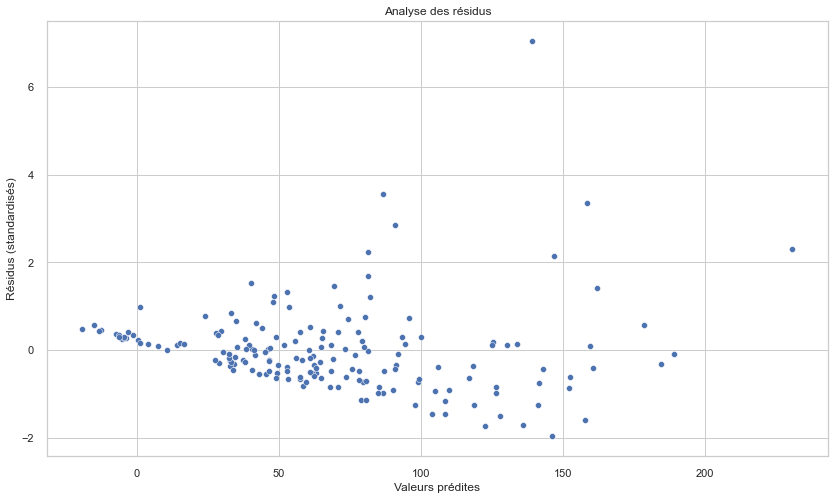

In [74]:
y_pred['Residuals'] = y_pred['TotalGHGEmissions'] - y_pred['Label']


from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1)) 



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()

#### Feature Importance

In [75]:
evaluate_model(tuned_lasso)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [76]:
feature_importance =['PrimaryPropertyType_Senior Care Community',
                     'PrimaryPropertyType_Supermarket / Grocery Store',
                     'PrimaryPropertyType_Supermarket/Grocery Store',
                     'Steam_Powered',
                     'PrimaryPropertyType_Hotel',
                     'NaturalGas_Powered',
                     'PrimaryPropertyType_Laboratory',
                     'PrimaryPropertyType_Warehouse',
                     'BuildingType_SPS-District K-12',
                     'TotalGHGEmissions',
                     'PrimaryPropertyType_Small- and Mid-Sized Office']


for i in Total_GHG_Emissions_Sans_ENERGYSTARScore.columns:
    if i not in feature_importance:
        Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop(i, axis = 1)


In [77]:
exp_name = setup(data = Total_GHG_Emissions_Sans_ENERGYSTARScore,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,219
1,Target,TotalGHGEmissions
2,Original Data,"(866, 11)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(692, 10)"


In [78]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,47.4454,6153.8501,78.4465,0.2182,1.1888,2.2885
1,54.8340,9165.1562,95.7348,0.2877,1.0621,2.1107
2,54.3725,8133.6812,90.1869,0.1601,1.0457,1.8058
3,42.2193,6600.6050,81.2441,0.2012,1.2880,3.6573
4,44.5195,4138.3984,64.3304,0.0384,1.0724,2.4530
5,47.8266,6794.7173,82.4301,0.1179,1.0998,2.1752
6,43.7685,4737.1904,68.8272,0.1795,1.0735,2.6747
7,47.8503,5254.0366,72.4847,-0.0754,1.2296,2.3718
8,52.3719,7155.0654,84.5876,0.3203,1.1197,2.3588
9,52.6843,8568.5508,92.5665,0.1705,1.3992,8.6935


In [79]:
tuned_lasso = tune_model(lasso, custom_grid = {'alpha': np.linspace(0,2,10)},search_algorithm = 'grid')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,46.9011,6123.7056,78.2541,0.2221,1.1965,2.1523
1,53.8671,8499.3652,92.1920,0.3394,1.0527,2.0564
2,54.5997,8046.1855,89.7005,0.1692,1.0542,1.7844
3,41.7903,6531.9443,80.8204,0.2095,1.2646,3.4675
4,45.4030,4463.7046,66.8110,-0.0372,1.0829,2.5134
5,46.9418,6426.6953,80.1667,0.1657,1.0902,2.0546
6,43.0011,4657.4893,68.2458,0.1933,1.0601,2.5897
7,48.3705,5588.7544,74.7580,-0.1439,1.2347,2.2587
8,50.5011,6581.9966,81.1295,0.3747,1.1034,2.2686
9,51.7321,8357.4922,91.4193,0.1909,1.3669,8.3708


In [80]:
# generate predictions on unseen data
y_pred = predict_model(tuned_lasso)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,46.4680,5309.7715,72.8682,0.2606,1.1403,2.9539


### Avec passage au log de la variable à expliquer

In [81]:
Total_GHG_Emissions_Sans_ENERGYSTARScore = pd.read_csv('Dataset_TotalGHGEmissions.csv')
Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop('Unnamed: 0', axis=1)
Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop('ENERGYSTARScore', axis=1)

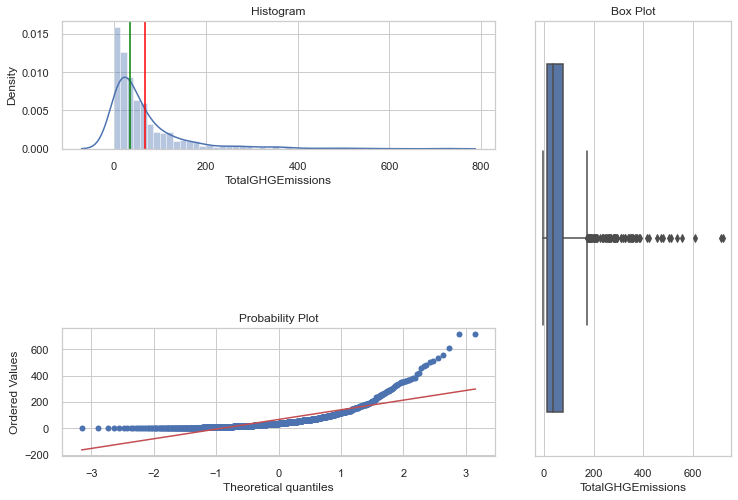

In [82]:
three_chart_plot(Total_GHG_Emissions_Sans_ENERGYSTARScore, 'TotalGHGEmissions')

In [83]:
from scipy.stats import skew
print("Skewness of TotalGHGEmissions is", Total_GHG_Emissions_Sans_ENERGYSTARScore['TotalGHGEmissions'].skew())

Skewness of TotalGHGEmissions is 3.105742678040428


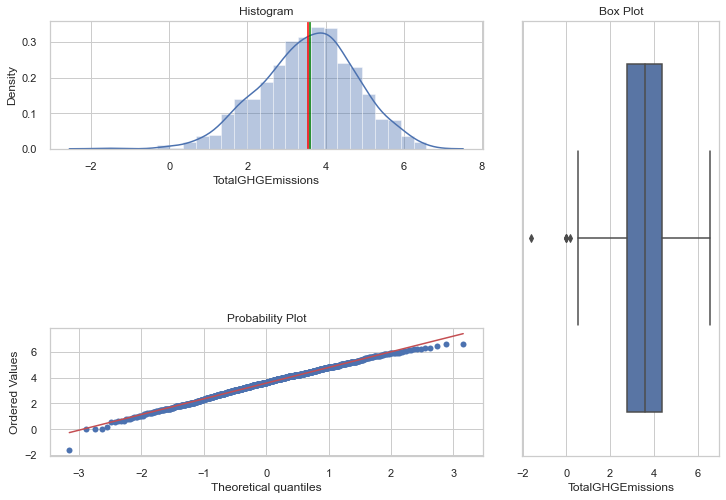

In [84]:
Total_GHG_Emissions_Sans_ENERGYSTARScore["TotalGHGEmissions"] = np.log1p(Total_GHG_Emissions_Sans_ENERGYSTARScore["TotalGHGEmissions"])
three_chart_plot(Total_GHG_Emissions_Sans_ENERGYSTARScore, 'TotalGHGEmissions')

In [85]:
print("Skewness of TotalGHGEmissions is", Total_GHG_Emissions_Sans_ENERGYSTARScore['TotalGHGEmissions'].skew())

Skewness of TotalGHGEmissions is -0.2588118749450214


In [86]:
from pycaret.regression import *
exp_name = setup(data = Total_GHG_Emissions_Sans_ENERGYSTARScore,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,8423
1,Target,TotalGHGEmissions
2,Original Data,"(866, 65)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(692, 62)"


In [87]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.7179,0.8903,0.9385,0.3843,0.2393,0.2624,0.0060
gbr,Gradient Boosting Regressor,0.7200,0.8989,0.9428,0.3800,0.2392,0.2596,0.0280
ridge,Ridge Regression,0.7199,0.8989,0.9422,0.3759,0.2399,0.2609,0.0050
lr,Linear Regression,0.7291,0.9215,0.9532,0.3629,0.2416,0.2617,0.0050
omp,Orthogonal Matching Pursuit,0.7326,0.9187,0.9542,0.3593,0.2416,0.2661,0.0060
rf,Random Forest Regressor,0.7525,0.9825,0.9865,0.3202,0.2465,0.2669,0.0840
ada,AdaBoost Regressor,0.7993,1.0496,1.0209,0.2739,0.2571,0.2893,0.0240
lightgbm,Light Gradient Boosting Machine,0.7742,1.0428,1.0166,0.2705,0.2544,0.2755,0.1030
et,Extra Trees Regressor,0.7920,1.1063,1.0461,0.2324,0.2619,0.2797,0.0790
xgboost,Extreme Gradient Boosting,0.8072,1.1237,1.0537,0.2172,0.2628,0.2842,0.1290


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [88]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8048,1.1709,1.0821,0.2079,0.3089,0.2770
1,0.7656,1.0365,1.0181,0.3883,0.2723,0.2536
2,0.7579,0.8245,0.9080,0.4468,0.2293,0.2824
3,0.6170,0.6847,0.8275,0.4924,0.1947,0.2145
4,0.7737,0.8535,0.9239,0.4263,0.2408,0.3153
5,0.6415,0.6598,0.8123,0.4588,0.1808,0.1959
6,0.7324,0.9444,0.9718,0.3531,0.2789,0.2292
7,0.6970,0.8672,0.9312,0.1700,0.2185,0.2493
8,0.6185,0.6703,0.8187,0.4313,0.2239,0.2678
9,0.7707,1.1909,1.0913,0.4681,0.2449,0.3387


In [89]:
tuned_br = tune_model(br, custom_grid = {'n_iter': range(100,500,10)},search_algorithm = 'grid')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8048,1.1709,1.0821,0.2079,0.3089,0.2770
1,0.7656,1.0365,1.0181,0.3883,0.2723,0.2536
2,0.7579,0.8245,0.9080,0.4468,0.2293,0.2824
3,0.6170,0.6847,0.8275,0.4924,0.1947,0.2145
4,0.7737,0.8535,0.9239,0.4263,0.2408,0.3153
5,0.6415,0.6598,0.8123,0.4588,0.1808,0.1959
6,0.7324,0.9444,0.9718,0.3531,0.2789,0.2292
7,0.6970,0.8672,0.9312,0.1700,0.2185,0.2493
8,0.6185,0.6703,0.8187,0.4313,0.2239,0.2678
9,0.7707,1.1909,1.0913,0.4681,0.2449,0.3387


In [90]:
# generate predictions on unseen data
y_pred = predict_model(tuned_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.7547,0.9690,0.9844,0.3310,0.2478,0.3925


#### Analyse des résidus

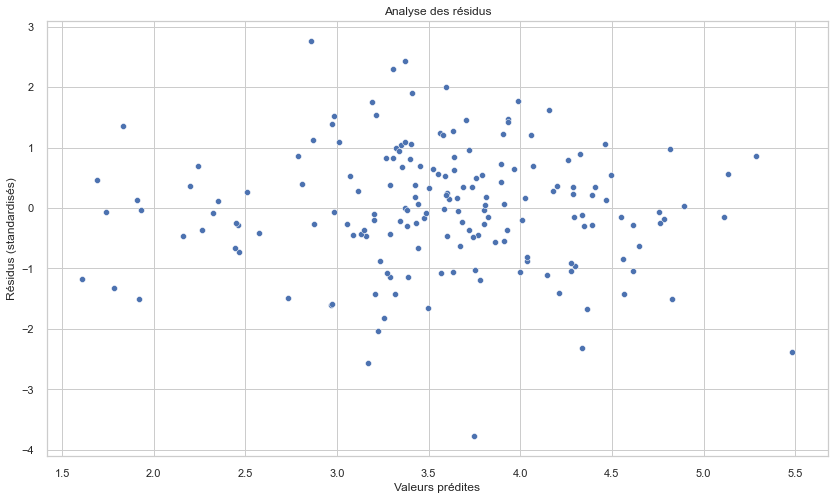

In [91]:
y_pred['Residuals'] = y_pred['TotalGHGEmissions'] - y_pred['Label']


from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1)) 



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()

#### Feature Importance

In [92]:
evaluate_model(tuned_br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [93]:
feature_importance =['NaturalGas_Powered',
                     'Steam_Powered',
                     'PrimaryPropertyType_Supermarket / Grocery Store',
                     'PrimaryPropertyType_Non-Refrigerated Warehouse',
                     'PrimaryPropertyType_Warehouse',
                     'PrimaryPropertyType_Senior Care Community',
                     'PrimaryPropertyType_Self-Storage Facility',
                     'PrimaryPropertyType_Laboratory',
                     'BuildingType_SPS-District K-12',
                     'TotalGHGEmissions',
                     'Neighborhood_NORTH']


for i in Total_GHG_Emissions_Sans_ENERGYSTARScore.columns:
    if i not in feature_importance:
        Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop(i, axis = 1)

In [94]:
exp_name = setup(data = Total_GHG_Emissions_Sans_ENERGYSTARScore,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,3712
1,Target,TotalGHGEmissions
2,Original Data,"(866, 11)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(692, 10)"


In [95]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8272,1.1164,1.0566,0.2343,0.2543,0.3013
1,0.7871,0.9444,0.9718,0.3000,0.2183,0.2452
2,0.7533,0.8553,0.9248,0.2909,0.2121,0.2412
3,0.8533,1.2213,1.1051,0.2168,0.3229,0.3444
4,0.8507,1.2616,1.1232,0.3229,0.2281,0.2904
5,0.7675,0.9690,0.9844,0.3293,0.2500,0.3157
6,0.8247,1.2313,1.1096,0.1728,0.3159,0.6730
7,0.7614,0.8605,0.9276,0.3304,0.2237,0.2768
8,0.6723,0.7112,0.8433,0.4543,0.2001,0.2337
9,0.9162,1.3340,1.1550,0.2531,0.3229,0.3974


In [96]:
tuned_br = tune_model(br, custom_grid = {'n_iter': range(100,500,10)},search_algorithm = 'grid')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8272,1.1164,1.0566,0.2343,0.2543,0.3013
1,0.7871,0.9444,0.9718,0.3000,0.2183,0.2452
2,0.7533,0.8553,0.9248,0.2909,0.2121,0.2412
3,0.8533,1.2213,1.1051,0.2168,0.3229,0.3444
4,0.8507,1.2616,1.1232,0.3229,0.2281,0.2904
5,0.7675,0.9690,0.9844,0.3293,0.2500,0.3157
6,0.8247,1.2313,1.1096,0.1728,0.3159,0.6730
7,0.7614,0.8605,0.9276,0.3304,0.2237,0.2768
8,0.6723,0.7112,0.8433,0.4543,0.2001,0.2337
9,0.9162,1.3340,1.1550,0.2531,0.3229,0.3974


In [97]:
# generate predictions on unseen data
y_pred = predict_model(tuned_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.8117,1.1637,1.0787,0.1670,0.2769,0.2860
